<h1>Trabajo Práctico 3: detectando barcos en el agua!<h1>

In [1]:
import numpy as np # Manejo de array
import pandas as pd # Trabajar con tablas
import os
import matplotlib.pyplot as plt # Plotear grafico 
from PIL import Image # Trabajar con imágenes (abrir, transformarla, dibujarle arriba, convertir formato)
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout, Convolution2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
# classification_report = Crear un informe de texto que muestre las principales métricas de clasificación.
# accuracy_score = calcular accuracy
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
#cuda para correr en nvidia
from pathlib import Path # Manejar path (un archivo en un lugar, crear/borrar, etc.)
#from IPython.display import Image

%matplotlib inline

Using TensorFlow backend.


In [2]:
# configuraciones generales de las imagenes
PICTURE_SIZE = 80
CHANNELS = 'rgb' # canales
PATH_IMAGE = 'imagenes_tp3_cv/' #ubicación de las imágenes

INPUT_COLUMNS = []

for color in CHANNELS:
    INPUT_COLUMNS.extend(['%s%i' % (color, i) 
                              for i in range(PICTURE_SIZE ** 2)])
    #print(color)
    #print(INPUT_COLUMNS)

<p>Cada fila es una imagen. <p>
<p>La imagen tiene 80 x 80 pixeles, y cada pixel tiene 3 valores, entonces tenemos 80 x 80 x 3 = 19.200‬ columnas.<p>

Imagen


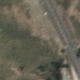

In [3]:
print('Imagen')
imagen = Image.open(PATH_IMAGE + '0__20160622_170157_0c64__-122.485753590087_37.835957669247584.png')
imagen


In [4]:
print('Todas las Imagenes')

for archivo in os.listdir(PATH_IMAGE):
    #print(os.path.join(PATH_IMAGE,archivo)) # Lista Nombre de la carpeta y nombre de la imagen
    #print(os.path.join(archivo)) # Solo Nombre de la imagen
    #print(archivo) # Solo Nombre de la imagen
    # Mostrar todas las imagenes (que reviente la memoria)
    #imagen = Image.open(PATH_IMAGE + os.path.join(archivo))
    #print(imagen)    
    # jajaja no reventó
    

SyntaxError: unexpected EOF while parsing (<ipython-input-4-1d8a9d415f08>, line 11)

In [12]:
cant_image = len(os.listdir(PATH_IMAGE)) 
print('Hay ' + str(cant_image) + ' imagenes en la carpeta ' + PATH_IMAGE)

Hay 4000 imagenes en la carpeta imagenes_tp3_cv/


In [6]:
#choclo de numeros

# hay que hacer 
# -> lista de tuplas donde estan los 3 colores para cada tupla
# -> se lo pasamos a np que es n x n x n y convertilo a un registro (se debe generar el data frame)

# una vez generado el dataframe, generar el .pkl para no tener que general el dataframe de nuevo

In [7]:
# cultivnado el maiz para obtener el choclo
# https://pillow.readthedocs.io/en/stable/

In [34]:
# cambiar el color de un pixel usando Pillow (transformar cada imagen a rojo, verde y azul)
# http://nightdeveloper.net/cambiar-usando-python/
#https://github.com/python-pillow/Pillow/issues/2601

imagen_1 = Image.open('Barco.png')

datos = list(imagen_1.getdata())

datos # -> lista de tuplas donde estan los 3 colores para cada tupla

# replicar por cada imagen que se tenga


[(113, 121, 114),
 (114, 121, 114),
 (115, 122, 115),
 (113, 122, 115),
 (113, 121, 114),
 (116, 124, 118),
 (120, 128, 122),
 (119, 126, 119),
 (120, 128, 121),
 (117, 126, 118),
 (115, 125, 115),
 (128, 136, 127),
 (118, 126, 117),
 (113, 120, 112),
 (114, 121, 113),
 (113, 118, 111),
 (114, 120, 113),
 (116, 122, 115),
 (116, 122, 116),
 (115, 120, 115),
 (115, 121, 116),
 (116, 121, 116),
 (112, 118, 111),
 (115, 122, 114),
 (116, 123, 116),
 (116, 122, 115),
 (120, 125, 118),
 (116, 122, 114),
 (115, 121, 114),
 (119, 125, 118),
 (117, 123, 116),
 (115, 122, 115),
 (115, 122, 114),
 (114, 121, 112),
 (118, 125, 116),
 (106, 114, 106),
 (98, 106, 98),
 (114, 120, 113),
 (117, 124, 116),
 (115, 123, 115),
 (115, 122, 115),
 (115, 123, 116),
 (115, 123, 116),
 (112, 121, 113),
 (106, 116, 106),
 (110, 117, 109),
 (113, 119, 114),
 (113, 120, 115),
 (114, 120, 114),
 (116, 122, 116),
 (115, 121, 115),
 (112, 119, 112),
 (114, 121, 114),
 (110, 118, 111),
 (109, 117, 110),
 (110, 117, 

In [ ]:
""" No borrar

pixeles = imagen_1.load()
#imagen.fp #BufferedReader

for fila in range(PICTURE_SIZE):
    for caluman in range(PICTURE_SIZE):
        #pixeles[fila,caluman] = (255,00,00)
         print(pixeles[fila,caluman]) # RBG de la imagen
         

#imagen_1.save("nueva_imagen.png")
#imagen_ = Image.open('nueva_imagen.png')
#imagen_
"""

Parámetros y conceptos más comunes
Input size W: el tamaño de la entrada
filters: cantidad de filtros
kernel_size F: tamaño del kernel; se establece el ancho y alto, la profundidad depende de las entradas
strides S: la cantidad de pasos que muevo el kernel
padding P: agrega ceros en los bordes para mantener el tamaño original
activation: función de activación aplicada pixel a pixel
La cantidad de neuronas de salida es (W - F + 2P)/S + 1